<a href="https://colab.research.google.com/github/fmbento/Jupyter-Notebooks_ad-hoc-solutions/blob/main/Extract_Images_(PNGs)_from_PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Extract** raw **images** from a **PDF File** and packs them (PNGs) as a zip

### Step-by-step guide:

**Upload** the **PDF** to the **root** folder (2) and **edit the name of the PDF** (3), variable "PDFfile", first line of the code (without the file extension, .pdf), before running the cell bellow (4).

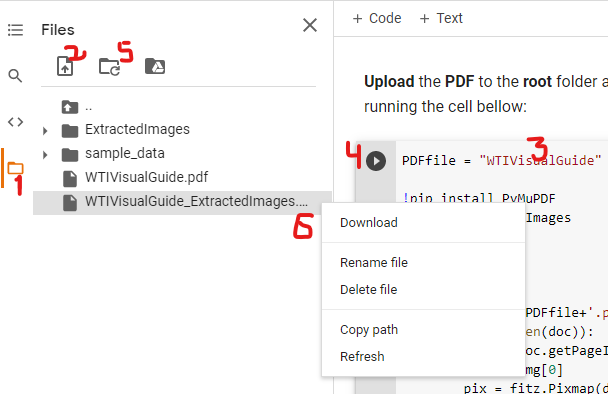

**Refresh** the **folder contents** (5) and **download** the file **<** **PDF filename >_ExtractedImages.zip** (6) from the root folder.

In [ ]:
PDFfile = "example"

!pip install PyMuPDF
!mkdir ExtractedImages

import fitz
import shutil

doc = fitz.open(PDFfile+'.pdf')
for i in range(len(doc)):
    for img in doc.getPageImageList(i):
        xref = img[0]
        pix = fitz.Pixmap(doc, xref)
        if pix.n < 5:       # this is GRAY or RGB
            pix.writePNG("ExtractedImages/p%s-%s.png" % (i, xref))
        else:               # CMYK: convert to RGB first
            pix1 = fitz.Pixmap(fitz.csRGB, pix)
            pix1.writePNG("ExtractedImages/p%s-%s.png" % (i, xref))
            pix1 = None
        pix = None
        
shutil.make_archive(PDFfile+'_ExtractedImages', 'zip', './ExtractedImages', './')
!rm ExtractedImages/*.png        